In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
%matplotlib inline

데이터를 DataFrame에 읽어들임

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 survived가 없다. (이 데이터를 predict해서 제출해야 함)

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>

In [5]:
train.info()

print("train count : ", train.shape[0])
print("train arguments : ", train.shape[1])
print("")
for i in range(train.shape[1]):
    print(i, ":", train.columns[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
train count :  891
train arguments :  12

0 : PassengerId
1 : Survived
2 : Pclass
3 : Name
4 : Sex
5 : Age
6 : SibSp
7 : Parch
8 : Ticket
9 : Fare
10 : Cabin
11 : Embarked


### 먼저 비어있는 데이터를 처리해야 한다.
- 너무 많이 빠진 항목이면 제거한다.
- 중요한 항목이라고 판단되는 항목은 데이터를 추정해서 채워 넣도록 한다.

**Age** : null이 많고 나이가 중요할 것으로 판단되므로 데이터를 채워야 할 필요가 있다. <br>
**cabin** : null이 너무 많다. -> 제거 <br>
**Embarked** : null이 거의 없으므로 가장 많은 빈도를 가진 값으로 채워도 될 것으로 판단됨 <br>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # seaborn의 스타일/폰트 등의 속성을 설정한다.(기본값으로 설정)

In [7]:
def bar_chart_survived(feature):
    '''
    특정 feature를 'Survived' 값에 따라 분류해서 bar chart로 보여준다.
    '''
    
    survived = train[ train[Columns.Survived] == 1][feature].value_counts() # 생존자(Columns.Survived] == 1) 중 feature에 해당하는 사람들의 수
    dead = train[ train[Columns.Survived] == 0][feature].value_counts() # 사망자(Columns.Survived] == 1) 중 feature에 해당하는 사람들의 수
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(8,5))

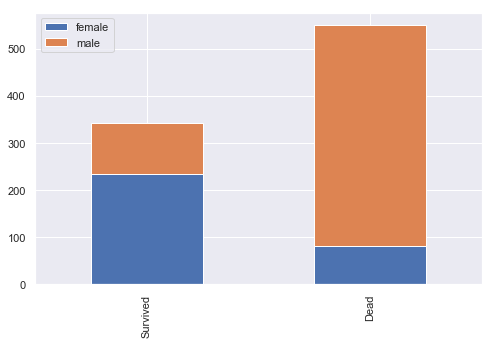

In [8]:
bar_chart_survived(Columns.Sex)

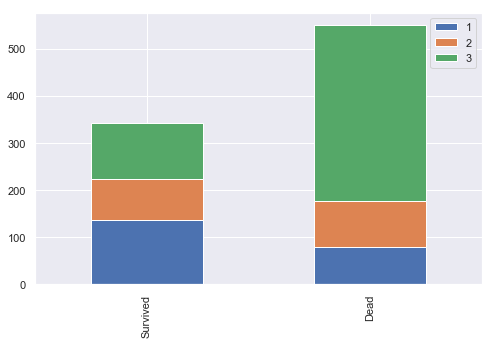

In [9]:
bar_chart_survived(Columns.Pclass)

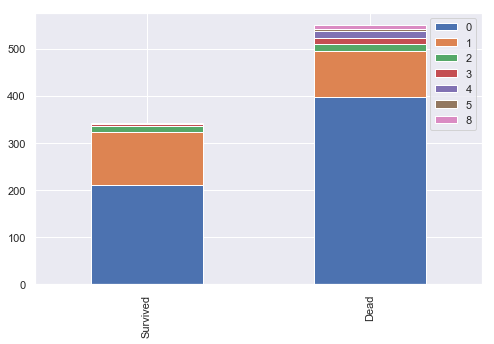

In [10]:
bar_chart_survived(Columns.SibSp)

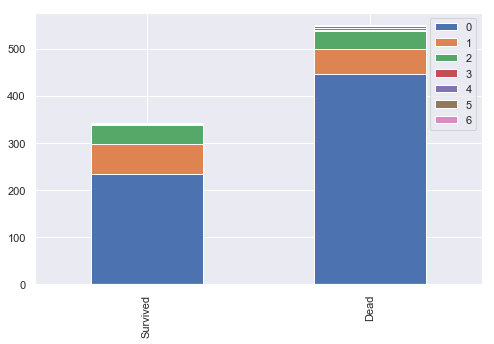

In [11]:
bar_chart_survived(Columns.Parch)

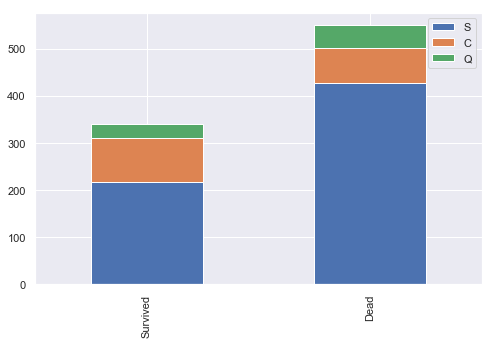

In [12]:
bar_chart_survived(Columns.Embarked)

## 데이터 특성 확인

In [13]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smith, Mr. James Clinch",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 데이터 가공

- Cabin, Ticket 삭제
- Age : null 제거
- Embarked : 숫자로 변경

Cabin, Ticket 항목 삭제

In [14]:
train = train.drop([Columns.Cabin], axis=1)
test = test.drop([Columns.Cabin], axis=1)

train = train.drop([Columns.Ticket], axis=1)
test = test.drop([Columns.Ticket], axis=1)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Embarked 중 null 항목을 제거

In [16]:
most_embarked_label = train[Columns.Embarked].value_counts().index[0]
train = train.fillna({Columns.Embarked : most_embarked_label})
most_embarked_label = test[Columns.Embarked].value_counts().index[0]
test = test.fillna({Columns.Embarked : most_embarked_label})
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,"Smith, Mr. James Clinch",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [17]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,417.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Salander, Mr. Karl Johan",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,NaN,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,35.627188,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,55.907576,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,31.500000,NaN


Embarked 항목을 숫자로 변경한다.(문자열은 모두 숫자 값으로 변경해야 한다.)

In [18]:
print(train[Columns.Embarked].value_counts().index)
embarked_mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
train[Columns.Embarked] = train[Columns.Embarked].map(embarked_mapping)
test[Columns.Embarked] = test[Columns.Embarked].map(embarked_mapping)

Index(['S', 'C', 'Q'], dtype='object')


In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,1


Name에서 호칭을 추출해서 새 항목(Title)을 추가한다.

In [21]:
combine = [train, test]
for dataset in combine:
    dataset[Columns.Title] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
'''
crosstab : 두개 이상의 factor에 대해 교차 분석표를 생성한다.
'''
pd.crosstab(train[Columns.Title], train[Columns.Sex])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


생성한 Title들을 비슷한 것들을 모아 정리한다.

In [22]:
for dataset in combine:
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Mlle'], 'Miss')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Ms'], 'Miss')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Mme'], 'Mrs')

train[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.285714
Royal,1.000000


In [23]:
pd.crosstab(train[Columns.Title], train[Columns.Survived]) # 앞이 데이터 뒤가 column

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,6
Royal,0,2


In [24]:
"""
Title을 수가 가장 많은 순서대로 오름차순으로 숫자로 변환한다.
"""
idxs = train[Columns.Title].value_counts().index # Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
title_mapping = {}
for i in range(len(idxs)):
    title_mapping[idxs[i]] = i + 1

# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

for dataset in combine:
    dataset[Columns.Title] = dataset[Columns.Title].map(title_mapping)
    dataset[Columns.Title] = dataset[Columns.Title].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


Name 삭제

In [25]:
train = train.drop([Columns.Name], axis=1)
test = test.drop([Columns.Name], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,1,1
1,2,1,1,female,38.0,1,0,71.2833,2,3
2,3,1,3,female,26.0,0,0,7.9250,1,2
3,4,1,1,female,35.0,1,0,53.1000,1,3
4,5,0,3,male,35.0,0,0,8.0500,1,1


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,3,1
1,893,3,female,47.0,1,0,7.0000,1,3
2,894,2,male,62.0,0,0,9.6875,3,1
3,895,3,male,27.0,0,0,8.6625,1,1
4,896,3,female,22.0,1,1,12.2875,1,3


Sex도 숫자로 변경한다.

In [27]:
mapping = {"male" : 0, "female":1}
train[Columns.Sex] = train[Columns.Sex].map(mapping)
test[Columns.Sex] = test[Columns.Sex].map(mapping)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,3
2,3,1,3,1,26.0,0,0,7.9250,1,2
3,4,1,1,1,35.0,1,0,53.1000,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,1


In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,3,1
1,893,3,1,47.0,1,0,7.0000,1,3
2,894,2,0,62.0,0,0,9.6875,3,1
3,895,3,0,27.0,0,0,8.6625,1,1
4,896,3,1,22.0,1,1,12.2875,1,3


Age에 있는 NULL 값을 채운다.<br>
이전에 추가한 Title값으로 대충 채워 본다.

In [30]:
import numpy as np

# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}
'''
비어있는 나이를 채워야 한다.
이전에 생성한 Title로 rough하게 추정해 본다.
'''

def guess_age(row):
    title_age_mapping = {1: 24, 2: 24, 3: 24, 4: 40, 5: 40, 6: 40} # Master, Rare, Royal의 경우 나이가 좀 많지 않을까 추정해 본다.
    return title_age_mapping[row[Columns.Title]]

def fixup_age(df):    
    for idx, row in df[df[Columns.Age].isnull()].iterrows():
        '''
        loc indexer: 레이블 값 기반으로 데이터에 접근하려고 할 때 사용
        loc[row_idx] or loc[row_idx, column_name]
                
        '''
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
train = fixup_age(train)
#aaa.describe(include='all')
train.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,3
2,3,1,3,1,26.0,0,0,7.9250,1,2
3,4,1,1,1,35.0,1,0,53.1000,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,1
5,6,0,3,0,24.0,0,0,8.4583,3,1
6,7,0,1,0,54.0,0,0,51.8625,1,1
7,8,0,3,0,2.0,3,1,21.0750,1,4
8,9,1,3,1,27.0,0,2,11.1333,1,3
9,10,1,2,1,14.0,1,0,30.0708,2,3


In [31]:
test = fixup_age(test)
test.head(40)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,3,1
1,893,3,1,47.0,1,0,7.0000,1,3
2,894,2,0,62.0,0,0,9.6875,3,1
3,895,3,0,27.0,0,0,8.6625,1,1
4,896,3,1,22.0,1,1,12.2875,1,3
5,897,3,0,14.0,0,0,9.2250,1,1
6,898,3,1,30.0,0,0,7.6292,3,2
7,899,2,0,26.0,1,1,29.0000,1,1
8,900,3,1,18.0,0,0,7.2292,2,3
9,901,3,0,21.0,2,0,24.1500,1,1


Fare(요금)를 분포에 따라 균등인원이 포함된 등급으로 변경한다.

In [34]:
'''
test에는 Fare 중에 NaN이 하나 있다.
이 정도는 그냥 평균값을 넣어주면 될 것으로 판단된다.
'''

def fixup_fare(df):    
    for idx, row in df[df[Columns.Fare].isnull()].iterrows():        
        df.loc[idx, Columns.Fare] = df[Columns.Fare].mean()
    return df

test = fixup_fare(test)

'''
numeric값을 가공할 때 train/test를 합쳐서 해야 할 것 같다.(동일 분포를 유지하기 위해서?...)

pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

x : 1d array or series
q : 등분할 수(정수) 거나 등분 비율([0, 0.25, 0.5, 0.75, 1.])
labels : 등분한 그룹마다 붙일 label 배열
'''

# train/test를 합친다.
train_len = train.shape[0]
merged = train.append(test)
merged.head(n=merged.shape[0])

merged[Columns.FareBand] = pd.qcut(merged[Columns.Fare], 4, labels=[1,2,3,4]).astype('float')

train = merged[:train_len]
test = merged[train_len:]
test = test.drop([Columns.Survived], axis=1)

In [35]:
train.describe()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,FareBand
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,28.656756,1.361392,32.204208,0.381594,446.000000,2.308642,0.352413,0.523008,0.383838,1.730640,2.489338
std,13.222624,0.635673,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592,1.038232,1.111052
min,0.420000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,22.000000,1.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000,1.000000,1.500000
50%,24.000000,1.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,35.000000,2.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000
max,80.000000,3.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000,6.000000,4.000000


In [36]:
test.describe(include='all')

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Title,FareBand
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,29.135167,1.464115,35.627188,0.392344,1100.500000,2.265550,0.363636,0.447368,1.741627,2.485646
std,12.922045,0.685516,55.840500,0.981429,120.810458,0.841838,0.481622,0.896760,1.006091,1.148885
min,0.170000,1.000000,0.000000,0.000000,892.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,23.000000,1.000000,7.895800,0.000000,996.250000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,24.000000,1.000000,14.454200,0.000000,1100.500000,3.000000,0.000000,0.000000,1.000000,2.000000
75%,36.000000,2.000000,31.500000,0.000000,1204.750000,3.000000,1.000000,1.000000,2.000000,4.000000
max,76.000000,3.000000,512.329200,9.000000,1309.000000,3.000000,1.000000,8.000000,5.000000,4.000000


input 데이터를 0~1로 scaling한다.
train/test 데이터는 원래 같은 group에 있던 것을 나눈 것이므로 정확하게 scaling하기 위해서는 합쳐서 scaling 처리하고 다시 분리해야 할 것 같다.

In [38]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler()    
    if columnName in data:
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset):
    dataset = normalize_column(dataset, Columns.Age)
    dataset = normalize_column(dataset, Columns.Pclass)
    dataset = normalize_column(dataset, Columns.Embarked)
    dataset = normalize_column(dataset, Columns.Title)
    dataset = normalize_column(dataset, Columns.SibSp)    
    dataset = normalize_column(dataset, Columns.FareBand)    
    dataset = normalize_column(dataset, Columns.Parch)

train_len = train.shape[0]
merged = train.append(test)
#merged.head(n=merged.shape[0])

normalize(merged)

train = merged[:train_len]
test = merged[train_len:]
test = test.drop([Columns.Survived], axis=1)

train.describe(include='all')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Age,Embarked,Fare,FareBand,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.356843,0.180696,32.204208,0.496446,0.042399,446.000000,0.654321,0.352413,0.065376,0.383838,0.146128
std,0.165635,0.317837,49.693429,0.370351,0.089562,257.353842,0.418036,0.477990,0.137843,0.486592,0.207646
min,0.003132,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.273456,0.000000,7.910400,0.166667,0.000000,223.500000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.298509,0.000000,14.454200,0.333333,0.000000,446.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.436302,0.500000,31.000000,0.666667,0.000000,668.500000,1.000000,1.000000,0.125000,1.000000,0.200000
max,1.000000,1.000000,512.329200,1.000000,0.666667,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
train.head(n=50)

,Age,Embarked,Fare,FareBand,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,0.273456,0.0,7.2500,0.000000,0.000000,1,1.0,0,0.125,0.0,0.0
1,0.473882,0.5,71.2833,1.000000,0.000000,2,0.0,1,0.125,1.0,0.4
2,0.323563,0.0,7.9250,0.333333,0.000000,3,1.0,1,0.000,1.0,0.2
3,0.436302,0.0,53.1000,1.000000,0.000000,4,0.0,1,0.125,1.0,0.4
4,0.436302,0.0,8.0500,0.333333,0.000000,5,1.0,0,0.000,0.0,0.0
5,0.298509,1.0,8.4583,0.333333,0.000000,6,1.0,0,0.000,0.0,0.0
6,0.674308,0.0,51.8625,1.000000,0.000000,7,0.0,0,0.000,0.0,0.0
7,0.022924,0.0,21.0750,0.666667,0.111111,8,1.0,0,0.375,0.0,0.6
8,0.336089,0.0,11.1333,0.333333,0.222222,9,1.0,1,0.000,1.0,0.4
9,0.173243,0.5,30.0708,0.666667,0.000000,10,0.5,1,0.125,1.0,0.4


In [40]:
test.head(n=50)

,Age,Embarked,Fare,FareBand,Parch,PassengerId,Pclass,Sex,SibSp,Title
0,0.430039,1.0,7.8292,0.000000,0.000000,892,1.0,0,0.000,0.0
1,0.586622,0.0,7.0000,0.000000,0.000000,893,1.0,1,0.125,0.4
2,0.774521,1.0,9.6875,0.333333,0.000000,894,0.5,0,0.000,0.0
3,0.336089,0.0,8.6625,0.333333,0.000000,895,1.0,0,0.000,0.0
4,0.273456,0.0,12.2875,0.333333,0.111111,896,1.0,1,0.125,0.4
5,0.173243,0.0,9.2250,0.333333,0.000000,897,1.0,0,0.000,0.0
6,0.373669,1.0,7.6292,0.000000,0.000000,898,1.0,1,0.000,0.2
7,0.323563,0.0,29.0000,0.666667,0.111111,899,0.5,0,0.125,0.0
8,0.223350,0.5,7.2292,0.000000,0.000000,900,1.0,1,0.000,0.4
9,0.260929,0.0,24.1500,0.666667,0.000000,901,1.0,0,0.250,0.0


필요없는 feature들을 제거한다.

In [41]:
train = train.drop([Columns.PassengerId, Columns.Fare], axis=1)
train.head()

,Age,Embarked,FareBand,Parch,Pclass,Sex,SibSp,Survived,Title
0,0.273456,0.0,0.000000,0.0,1.0,0,0.125,0.0,0.0
1,0.473882,0.5,1.000000,0.0,0.0,1,0.125,1.0,0.4
2,0.323563,0.0,0.333333,0.0,1.0,1,0.000,1.0,0.2
3,0.436302,0.0,1.000000,0.0,0.0,1,0.125,1.0,0.4
4,0.436302,0.0,0.333333,0.0,1.0,0,0.000,0.0,0.0


test 데이터의 경우 나중에 submission 생성 시 passengerId가 필요하므로, PassengerId는 백업해놓고 삭제한다.

In [42]:
test = test.drop([Columns.Fare], axis=1)
test_passenger_id = test[Columns.PassengerId] # 이건 나중에 쓸데가 있어서 백업해두어야 한다.
test = test.drop([Columns.PassengerId], axis=1)
print(test_passenger_id.shape)

(418,)


In [43]:
test.head()

,Age,Embarked,FareBand,Parch,Pclass,Sex,SibSp,Title
0,0.430039,1.0,0.000000,0.000000,1.0,0,0.000,0.0
1,0.586622,0.0,0.000000,0.000000,1.0,1,0.125,0.4
2,0.774521,1.0,0.333333,0.000000,0.5,0,0.000,0.0
3,0.336089,0.0,0.333333,0.000000,1.0,0,0.000,0.0
4,0.273456,0.0,0.333333,0.111111,1.0,1,0.125,0.4


In [44]:
train_X = train.drop(Columns.Survived, axis=1).values # Series.values는 numpy array 데이터임.
train_Y = train[Columns.Survived].values.reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(891, 8)
(891, 1)


모델을 만들어서 돌려보자~

In [45]:
import tensorflow as tf

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)

X = tf.placeholder(tf.float32, shape=[None, train_X.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
    
def build_neural_network(X):    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(X, 40, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    fc = tf.layers.dense(fc, 10, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    logits = tf.layers.dense(fc, 1, activation=None)    
    return logits

def get_batch(i, x, y, batch_size=32):
    end = (i + 1) * batch_size
    if end > x.shape[0]:        
        end = x.shape[0]        
    batch_x = x[i * batch_size : end]
    batch_y = y[i * batch_size : end]
    #print("get_batch:", batch_x.shape, batch_y.shape)
    return batch_x, batch_y

logits = build_neural_network(X)
# print(logits)
# print(train_Y.shape)
a = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits)
cost = tf.reduce_mean(a)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
prediction = tf.nn.sigmoid(logits)
is_correct = tf.equal(tf.round(prediction), Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epochs = 200
batch_size = 32
num_batch = train_X.shape[0] // batch_size
print("num_batch=", num_batch)
lr = 0.001
kp = 0.7

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        for batch_idx in range(num_batch + 1):
            batch_x, batch_y = get_batch(batch_idx, train_X, train_Y, batch_size)
            c, _ = session.run([cost, optimizer], feed_dict={X:batch_x, Y:batch_y, learning_rate:lr, keep_prob:kp})
            avg_cost += (c / num_batch)
            
        print("epoch:", epoch, " cost:{:.9f}".format(avg_cost))
        
    print("accuracy:", accuracy.eval(session=session, feed_dict={X:train_X, Y:train_Y, keep_prob:1.0}))
    
    pred = session.run(prediction, feed_dict={X:test, keep_prob:1.0}) # (418,1)
    print(pred.shape)
    print("nan count:", np.count_nonzero(np.isnan(pred) == True))
    
    test_predict_result=binarizer.fit_transform(pred)
    test_predict_result=test_predict_result.astype(np.int32)
    #print(test_predict_result[:10])
    submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
    submission.to_csv('submission.csv', index=False)
    
    print(submission)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(891, 8)
(891, 1)
num_batch= 27
epoch: 0  cost:0.693439729
epoch: 1  cost:0.665944137
epoch: 2  cost:0.631247743
epoch: 3  cost:0.595517695
epoch: 4  cost:0.547927514
epoch: 5  cost:0.537102205
epoch: 6  cost:0.516091264
epoch: 7  cost:0.513402713
epoch: 8  cost:0.510754436
epoch: 9  cost:0.494971387
epoch: 10  cost:0.494541933
epoch: 11  cost:0.480024211
epoch: 12  cost:0.485602345
epoch: 13  cost:0.474523404
epoch: 14  cost:0.472651038
epoch: 15  cost:0.480684815
epoch: 16  cost:0.468242054
epoch: 17  cost:0.488534499
epoch: 18  cost:0.476940252
epoch: 19  cost:0.458940186
epoch: 20  cost:0.491871329
epoch: 21  cost:0.488944666
epoch: 22  cost:0.464102362
epoch: 23  cost:0.453820028
epoch: 24  cost:0.471541065
epoch: 25  cost:0.487896078
epoch: 26  cost:0.451721191
epoch: 27  cost:0.451916702
epoch: 28  cost:0.442888486
epoch: 29  cost:0.442759473
epoch: 30  cost:0.450239257
epoch: 31  cost:0.450979925
epoch: 32  cost:0.440733407
epoch: 33  cost:0.457364117
epoch: 34  cost:0.43723301